In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df_stats1 = pd.read_csv('stats1.csv')
df_stats2 = pd.read_csv('stats2.csv')
df_participants = pd.read_csv('participants.csv')
df_matches = pd.read_csv('matches.csv')
df_champs = pd.read_csv('champs.csv')
df_teamstats = pd.read_csv('teamstats.csv')
df_teambans = pd.read_csv('teambans.csv')

C:\Users\Nicolai Lindner\AppData\Local\Temp\ipykernel_7204\428510500.py:2: DtypeWarning: Columns (52) have mixed types. Specify dtype option on import or set low_memory=False.
  df_stats2 = pd.read_csv('stats2.csv')


In [3]:
df_stats1.head(2)

,id,win,item1,item2,item3,item4,item5,item6,trinket,kills,...,neutralminionskilled,ownjunglekills,enemyjunglekills,totcctimedealt,champlvl,pinksbought,wardsbought,wardsplaced,wardskilled,firstblood
0,9,0,3748,2003,3111,3053,1419,1042,3340,6,...,69,42,27,610,13,0,0,10,0,0
1,10,0,2301,3111,3190,3107,0,0,3364,0,...,1,1,0,211,14,1,0,17,3,0


In [4]:
df_stats2.head(2)

,id,win,item1,item2,item3,item4,item5,item6,trinket,kills,...,neutralminionskilled,ownjunglekills,enemyjunglekills,totcctimedealt,champlvl,pinksbought,wardsbought,wardsplaced,wardskilled,firstblood
0,1028382,0,1056,3001,1052,3020,1058,1026,3340,7,...,0,0,0,50,12,0,0,6,0,0
1,1028383,0,1041,2003,0,0,0,0,3340,0,...,11,11,0,114,3,0,0,0,0,0


In [5]:
df_participants.head(2)

,id,matchid,player,championid,ss1,ss2,role,position
0,9,10,1,19,4,11,NONE,JUNGLE
1,10,10,2,267,3,4,DUO_SUPPORT,BOT


In [6]:
df_matches.head(2)

,id,gameid,platformid,queueid,seasonid,duration,creation,version
0,10,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675
1,11,3187425281,EUW1,420,8,1693,1495066760778,7.10.187.9675


In [7]:
df_champs.head(2)

,name,id
0,Jax,24
1,Sona,37


In [8]:
df_teamstats.head(2)

,matchid,teamid,firstblood,firsttower,firstinhib,firstbaron,firstdragon,firstharry,towerkills,inhibkills,baronkills,dragonkills,harrykills
0,10,100,0,1,0,0,0,0,5,0,0,0,0
1,10,200,1,0,1,1,1,1,10,3,1,3,1


In [9]:
df_teambans.head(2)

,matchid,teamid,championid,banturn
0,10,100,11,1
1,10,100,117,3


In [10]:
df_stats = pd.concat([df_stats1, df_stats2], ignore_index=True)

In [11]:
df_stats.head(2)


,id,win,item1,item2,item3,item4,item5,item6,trinket,kills,...,neutralminionskilled,ownjunglekills,enemyjunglekills,totcctimedealt,champlvl,pinksbought,wardsbought,wardsplaced,wardskilled,firstblood
0,9,0,3748,2003,3111,3053,1419,1042,3340,6,...,69,42,27,610,13,0,0,10,0,0
1,10,0,2301,3111,3190,3107,0,0,3364,0,...,1,1,0,211,14,1,0,17,3,0


In [12]:
df_stats.shape

(1834517, 56)

Data Cleaning

Putting everything together in one single dataframe

In [13]:
#Merging the participants df with the stats df with the id, DataFrames based on participant 'id', keeping all participant rows
df = pd.merge(df_participants, df_stats, how="left", on=['id'], suffixes=('', '_y'))

#Merges the resulting DataFrame with champs DataFrame based on 'championid' and champion 'id', adding champion information
df = pd.merge(df, df_champs, how="left", left_on="championid", right_on='id', suffixes=('', '_y'))       
    
#Merges the updated DataFrame with matches DataFrame based on 'matchid' and match 'id', adding match details
df = pd.merge(df, df_matches, how='left', left_on='matchid', right_on='id', suffixes=('','_y'))

In [14]:
df.columns

Index(['id', 'matchid', 'player', 'championid', 'ss1', 'ss2', 'role',
       'position', 'win', 'item1', 'item2', 'item3', 'item4', 'item5', 'item6',
       'trinket', 'kills', 'deaths', 'assists', 'largestkillingspree',
       'largestmultikill', 'killingsprees', 'longesttimespentliving',
       'doublekills', 'triplekills', 'quadrakills', 'pentakills',
       'legendarykills', 'totdmgdealt', 'magicdmgdealt', 'physicaldmgdealt',
       'truedmgdealt', 'largestcrit', 'totdmgtochamp', 'magicdmgtochamp',
       'physdmgtochamp', 'truedmgtochamp', 'totheal', 'totunitshealed',
       'dmgselfmit', 'dmgtoobj', 'dmgtoturrets', 'visionscore', 'timecc',
       'totdmgtaken', 'magicdmgtaken', 'physdmgtaken', 'truedmgtaken',
       'goldearned', 'goldspent', 'turretkills', 'inhibkills',
       'totminionskilled', 'neutralminionskilled', 'ownjunglekills',
       'enemyjunglekills', 'totcctimedealt', 'champlvl', 'pinksbought',
       'wardsbought', 'wardsplaced', 'wardskilled', 'firstblood', 'name

In [15]:
df.head(10)

,id,matchid,player,championid,ss1,ss2,role,position,win,item1,...,name,id_y,id_y,gameid,platformid,queueid,seasonid,duration,creation,version
0,9,10,1,19,4,11,NONE,JUNGLE,0.0,3748.0,...,Warwick,19,10,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675
1,10,10,2,267,3,4,DUO_SUPPORT,BOT,0.0,2301.0,...,Nami,267,10,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675
2,11,10,3,119,7,4,DUO_CARRY,BOT,0.0,1055.0,...,Draven,119,10,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675
3,12,10,4,114,12,4,SOLO,TOP,0.0,1029.0,...,Fiora,114,10,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675
4,13,10,5,112,4,3,SOLO,MID,0.0,3020.0,...,Viktor,112,10,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675
5,14,10,6,72,11,4,NONE,JUNGLE,1.0,1400.0,...,Skarner,72,10,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675
6,15,10,7,3,4,12,SOLO,TOP,1.0,3025.0,...,Galio,3,10,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675
7,16,10,8,103,14,4,SOLO,MID,1.0,3135.0,...,Ahri,103,10,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675
8,17,10,9,222,7,4,DUO_CARRY,BOT,1.0,3046.0,...,Jinx,222,10,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675
9,18,10,10,161,14,4,DUO_SUPPORT,BOT,1.0,1058.0,...,VelKoz,161,10,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675


# Data Cleaning

In [16]:
def final_position(col):
    if col['role'] in ('DUO_SUPPORT', 'DUO_CARRY'):
        return col['role']
    else:
        return col['position']

In [17]:
df['adjposition'] = df.apply(final_position, axis = 1)

In [18]:
df['team'] = df['player'].apply(lambda x: '1' if x <= 5 else '2')
df['team_role'] = df['team'] + ' - ' + df['adjposition']

In [19]:
remove_index = []
for i in ('1 - MID', '1 - TOP', '1 - DUO_SUPPORT', '1 - DUO_CARRY', '1 - JUNGLE',
          '2 - MID', '2 - TOP', '2 - DUO_SUPPORT', '2 - DUO_CARRY', '2 - JUNGLE'):
    df_remove = df[df['team_role'] == i].groupby('matchid').agg({'team_role':'count'})
    remove_index.extend(df_remove[df_remove['team_role'] != 1].index.values)

In [20]:
remove_index.extend(df[df['adjposition'] == 'BOT']['matchid'].unique())
remove_index = list(set(remove_index))

In [21]:
df.columns

Index(['id', 'matchid', 'player', 'championid', 'ss1', 'ss2', 'role',
       'position', 'win', 'item1', 'item2', 'item3', 'item4', 'item5', 'item6',
       'trinket', 'kills', 'deaths', 'assists', 'largestkillingspree',
       'largestmultikill', 'killingsprees', 'longesttimespentliving',
       'doublekills', 'triplekills', 'quadrakills', 'pentakills',
       'legendarykills', 'totdmgdealt', 'magicdmgdealt', 'physicaldmgdealt',
       'truedmgdealt', 'largestcrit', 'totdmgtochamp', 'magicdmgtochamp',
       'physdmgtochamp', 'truedmgtochamp', 'totheal', 'totunitshealed',
       'dmgselfmit', 'dmgtoobj', 'dmgtoturrets', 'visionscore', 'timecc',
       'totdmgtaken', 'magicdmgtaken', 'physdmgtaken', 'truedmgtaken',
       'goldearned', 'goldspent', 'turretkills', 'inhibkills',
       'totminionskilled', 'neutralminionskilled', 'ownjunglekills',
       'enemyjunglekills', 'totcctimedealt', 'champlvl', 'pinksbought',
       'wardsbought', 'wardsplaced', 'wardskilled', 'firstblood', 'name

In [22]:
df['adjposition']

0               JUNGLE
1          DUO_SUPPORT
2            DUO_CARRY
3                  TOP
4                  MID
              ...     
1834515      DUO_CARRY
1834516            MID
1834517    DUO_SUPPORT
1834518         JUNGLE
1834519            TOP
Name: adjposition, Length: 1834520, dtype: object

In [23]:
df['team_role']

0               1 - JUNGLE
1          1 - DUO_SUPPORT
2            1 - DUO_CARRY
3                  1 - TOP
4                  1 - MID
                ...       
1834515      2 - DUO_CARRY
1834516            2 - MID
1834517    2 - DUO_SUPPORT
1834518         2 - JUNGLE
1834519            2 - TOP
Name: team_role, Length: 1834520, dtype: object

# Making a column with only necassary attributes

In [24]:
df = df[['id', 'matchid', 'player', 'name', 'adjposition', 'team_role',
         'win', 'championid', 'kills', 'deaths', 'assists', 'turretkills', 'totdmgtochamp',
         'totheal', 'totminionskilled', 'goldspent', 'totdmgtaken', 'inhibkills',
         'pinksbought', 'wardsplaced', 'largestkillingspree', 'largestmultikill',
         'visionscore', 'firstblood', 'neutralminionskilled', 'ownjunglekills',
         'enemyjunglekills', 'totcctimedealt', 'champlvl', 'duration', 'platformid',
         'seasonid', 'version']]


Text(0.5, 1.0, 'Correlations - win vs factors (all games)')

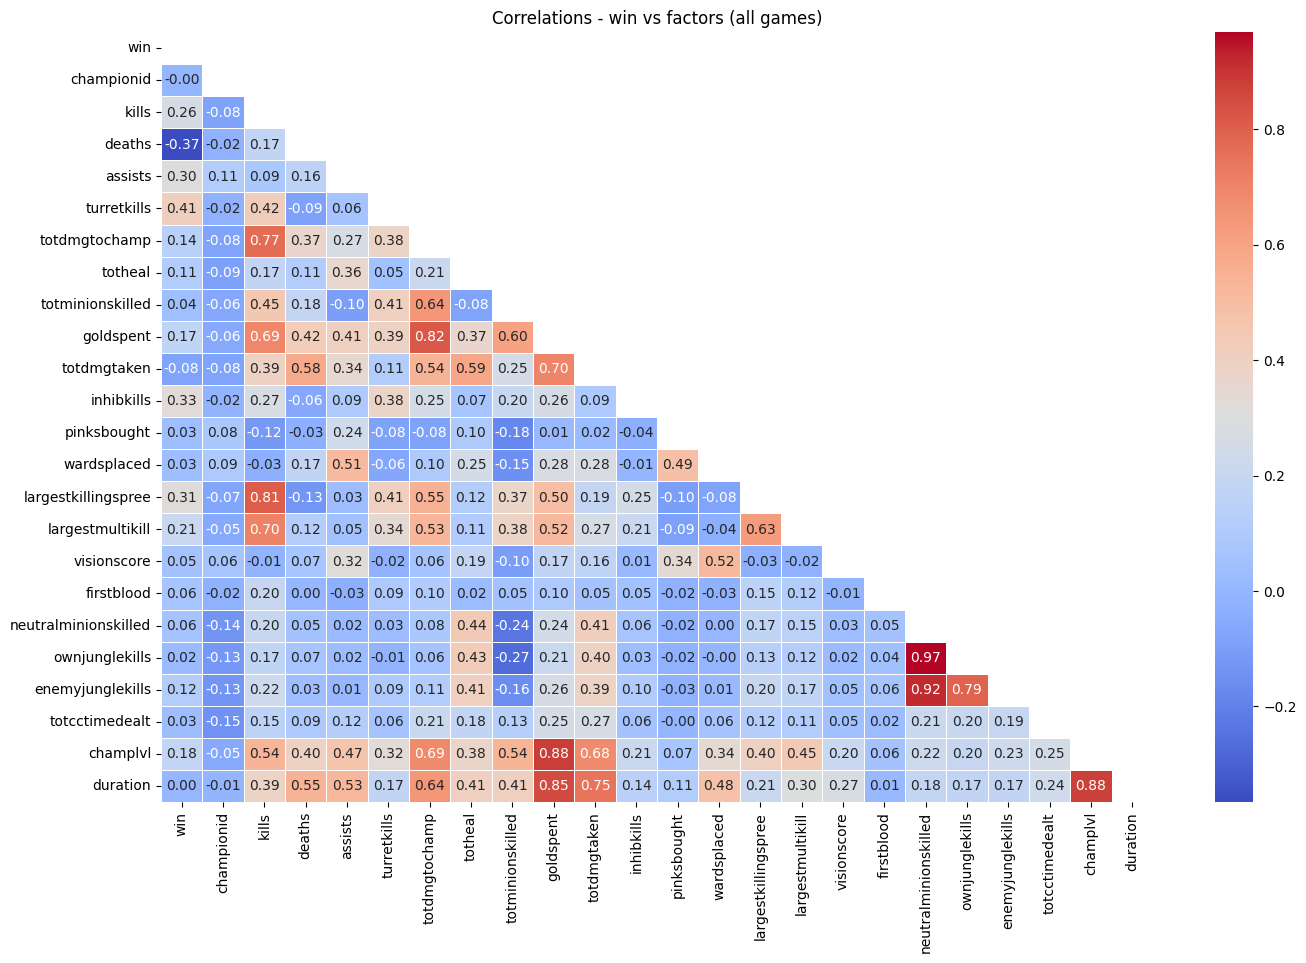

In [25]:
df_corr = df._get_numeric_data()

df_corr = df_corr.drop(['id', 'matchid', 'player', 'seasonid'], axis = 1)

m = np.zeros_like(df_corr.corr(), dtype=bool)
m[np.triu_indices_from(m)] = True

plt.figure(figsize=(16,10))
sb.heatmap(df_corr.corr(), cmap = 'coolwarm', annot= True, fmt = '.2f',
            linewidths=.5, mask = m)

plt.title('Correlations - win vs factors (all games)')


In [26]:
#Get correlation matrix without diagonal elements
correlation_matrix = df_corr.corr()
np.fill_diagonal(correlation_matrix.values, -np.inf)

# Get highest correlating pairs
highest_corr = correlation_matrix.stack().nlargest(5)  
print("Highest correlating pairs:")
print(highest_corr)

Highest correlating pairs:
neutralminionskilled  ownjunglekills          0.968095
ownjunglekills        neutralminionskilled    0.968095
neutralminionskilled  enemyjunglekills        0.920069
enemyjunglekills      neutralminionskilled    0.920069
goldspent             champlvl                0.881829
dtype: float64


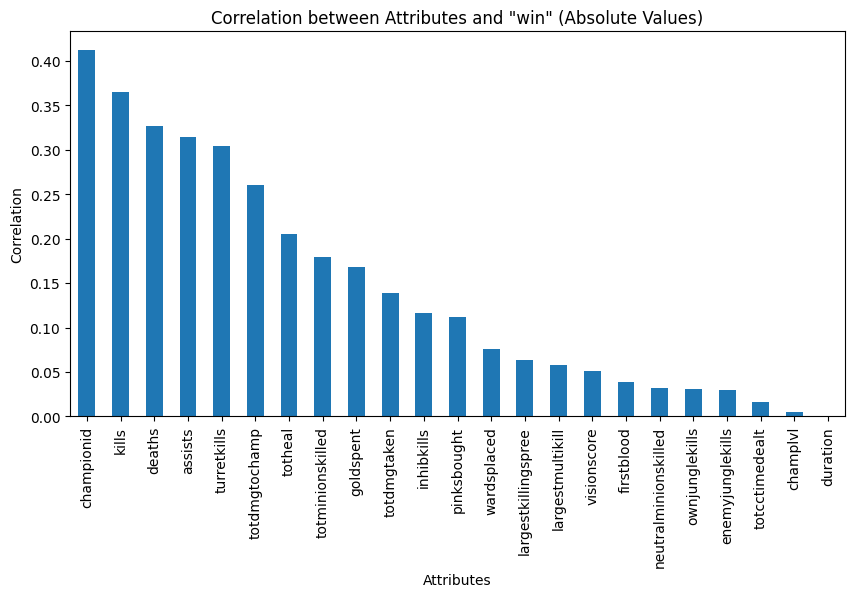

In [27]:
df_corr = df._get_numeric_data()
df_corr = df_corr.drop(['id', 'matchid', 'player', 'seasonid'], axis = 1)

# Calculate the correlation with the 'win' attribute
correlation_with_win = df_corr.corr()['win'].drop('win', axis=0)

# Sort the correlations based on absolute values in descending order
sorted_corr_with_win = correlation_with_win.abs().sort_values(ascending=False)

# Visualize the correlations with a bar plot
plt.figure(figsize=(10,5))
sorted_corr_with_win.plot(kind='bar')
plt.xlabel('Attributes')
plt.ylabel('Correlation')
plt.title('Correlation between Attributes and "win" (Absolute Values)')
plt.xticks(range(len(correlation_with_win.index)), correlation_with_win.index)
plt.show()


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1834520 entries, 0 to 1834519
Data columns (total 33 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   matchid               int64  
 2   player                int64  
 3   name                  object 
 4   adjposition           object 
 5   team_role             object 
 6   win                   float64
 7   championid            int64  
 8   kills                 float64
 9   deaths                float64
 10  assists               float64
 11  turretkills           float64
 12  totdmgtochamp         float64
 13  totheal               float64
 14  totminionskilled      float64
 15  goldspent             float64
 16  totdmgtaken           float64
 17  inhibkills            float64
 18  pinksbought           float64
 19  wardsplaced           float64
 20  largestkillingspree   float64
 21  largestmultikill      float64
 22  visionscore           float64
 23  firstbl

In [29]:
print("\nData types for each attribute:")
for column in df.columns:
    data_type = df[column].dtype
    if data_type == 'object':
        print(f"{column}: string")
    elif pd.api.types.is_categorical_dtype(data_type):
        print(f"{column}: categorical")
    elif np.issubdtype(data_type, np.number):
        print(f"{column}: numeric")
    else:
        print(f"{column}: {data_type}")


Data types for each attribute:
id: numeric
matchid: numeric
player: numeric
name: string
adjposition: string
team_role: string
win: numeric
championid: numeric
kills: numeric
deaths: numeric
assists: numeric
turretkills: numeric
totdmgtochamp: numeric
totheal: numeric
totminionskilled: numeric
goldspent: numeric
totdmgtaken: numeric
inhibkills: numeric
pinksbought: numeric
wardsplaced: numeric
largestkillingspree: numeric
largestmultikill: numeric
visionscore: numeric
firstblood: numeric
neutralminionskilled: numeric
ownjunglekills: numeric
enemyjunglekills: numeric
totcctimedealt: numeric
champlvl: numeric
duration: numeric
platformid: string
seasonid: numeric
version: string


In [30]:
NN_df = df.select_dtypes(include=np.number)
NN_df

,id,matchid,player,win,championid,kills,deaths,assists,turretkills,totdmgtochamp,...,largestmultikill,visionscore,firstblood,neutralminionskilled,ownjunglekills,enemyjunglekills,totcctimedealt,champlvl,duration,seasonid
0,9,10,1,0.0,19,6.0,10.0,1.0,0.0,9101.0,...,2.0,14.0,0.0,69.0,42.0,27.0,610.0,13.0,1909,8
1,10,10,2,0.0,267,0.0,2.0,12.0,1.0,8478.0,...,0.0,30.0,0.0,1.0,1.0,0.0,211.0,14.0,1909,8
2,11,10,3,0.0,119,7.0,8.0,5.0,0.0,14425.0,...,2.0,26.0,0.0,3.0,1.0,2.0,182.0,14.0,1909,8
3,12,10,4,0.0,114,5.0,11.0,2.0,3.0,15267.0,...,1.0,5.0,0.0,6.0,6.0,0.0,106.0,15.0,1909,8
4,13,10,5,0.0,112,2.0,8.0,2.0,1.0,18229.0,...,1.0,15.0,0.0,4.0,3.0,1.0,159.0,15.0,1909,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1834515,1865600,187588,6,0.0,222,11.0,10.0,2.0,1.0,27130.0,...,3.0,0.0,0.0,27.0,20.0,7.0,127.0,18.0,2534,5
1834516,1865601,187588,7,0.0,1,11.0,9.0,7.0,0.0,28805.0,...,1.0,0.0,0.0,3.0,3.0,0.0,128.0,18.0,2534,5
1834517,1865602,187588,8,0.0,53,4.0,8.0,10.0,1.0,12681.0,...,1.0,0.0,0.0,0.0,0.0,0.0,304.0,17.0,2534,5
1834518,1865603,187588,9,0.0,92,2.0,11.0,3.0,0.0,8878.0,...,1.0,0.0,0.0,47.0,40.0,7.0,101.0,15.0,2534,5


In [31]:
#Using random forest


In [32]:
from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['name', 'adjposition', 'team_role', 'platformid']

# Apply label encoding to each specified column
label_encoders = {}
for col in columns_to_encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [33]:
for col in df.columns:
    print(f"Column: {col}")
    print(df[col].describe())
    print("\n")

Column: id
count    1.834520e+06
mean     9.448514e+05
std      5.328720e+05
min      9.000000e+00
25%      4.848568e+05
50%      9.450905e+05
75%      1.406918e+06
max      1.865604e+06
Name: id, dtype: float64


Column: matchid
count    1.834520e+06
mean     9.488531e+04
std      5.359679e+04
min      1.000000e+01
25%      4.862775e+04
50%      9.475950e+04
75%      1.413752e+05
max      1.875880e+05
Name: matchid, dtype: float64


Column: player
count    1.834520e+06
mean     5.489930e+00
std      2.871098e+00
min      1.000000e+00
25%      3.000000e+00
50%      5.000000e+00
75%      8.000000e+00
max      1.000000e+01
Name: player, dtype: float64


Column: name
count    1.834520e+06
mean     6.498579e+01
std      3.916003e+01
min      0.000000e+00
25%      3.100000e+01
50%      6.200000e+01
75%      1.000000e+02
max      1.350000e+02
Name: name, dtype: float64


Column: adjposition
count    1.834520e+06
mean     2.944523e+00
std      1.480157e+00
min      0.000000e+00
25%      2.000

In [34]:
df = df.drop(['version'], axis=1)

In [35]:
df.head(15)

,id,matchid,player,name,adjposition,team_role,win,championid,kills,deaths,...,visionscore,firstblood,neutralminionskilled,ownjunglekills,enemyjunglekills,totcctimedealt,champlvl,duration,platformid,seasonid
0,9,10,1,124,3,3,0.0,19,6.0,10.0,...,14.0,0.0,69.0,42.0,27.0,610.0,13.0,1909,1,8
1,10,10,2,72,2,2,0.0,267,0.0,2.0,...,30.0,0.0,1.0,1.0,0.0,211.0,14.0,1909,1,8
2,11,10,3,22,1,1,0.0,119,7.0,8.0,...,26.0,0.0,3.0,1.0,2.0,182.0,14.0,1909,1,8
3,12,10,4,28,5,5,0.0,114,5.0,11.0,...,5.0,0.0,6.0,6.0,0.0,106.0,15.0,1909,1,8
4,13,10,5,121,4,4,0.0,112,2.0,8.0,...,15.0,0.0,4.0,3.0,1.0,159.0,15.0,1909,1,8
5,14,10,6,98,3,9,1.0,72,3.0,3.0,...,18.0,0.0,111.0,81.0,30.0,808.0,16.0,1909,1,8
6,15,10,7,30,5,11,1.0,3,4.0,5.0,...,25.0,0.0,6.0,0.0,6.0,179.0,16.0,1909,1,8
7,16,10,8,1,4,10,1.0,103,13.0,4.0,...,12.0,0.0,6.0,3.0,3.0,48.0,17.0,1909,1,8
8,17,10,9,46,1,7,1.0,222,15.0,3.0,...,12.0,1.0,7.0,2.0,5.0,440.0,16.0,1909,1,8
9,18,10,10,119,2,8,1.0,161,4.0,5.0,...,71.0,0.0,2.0,1.0,1.0,260.0,16.0,1909,1,8


In [36]:
#Random Forest cannot compute wih nan values, imputations to fix the na values
df.isna().sum()

id                      0
matchid                 0
player                  0
name                    0
adjposition             0
team_role               0
win                     3
championid              0
kills                   3
deaths                  3
assists                 3
turretkills             3
totdmgtochamp           3
totheal                 3
totminionskilled        3
goldspent               3
totdmgtaken             3
inhibkills              3
pinksbought             3
wardsplaced             3
largestkillingspree     3
largestmultikill        3
visionscore             3
firstblood              3
neutralminionskilled    3
ownjunglekills          3
enemyjunglekills        3
totcctimedealt          3
champlvl                3
duration                0
platformid              0
seasonid                0
dtype: int64

In [37]:
df = df.dropna()

In [ ]:
df.head()
df_cleaned = df.to_csv("E:\Datensätze\daten.csv", index=False)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC
import time

In [ ]:
# Split data into X and y
X = df.drop("win", axis=1) # Features
y = df["win"] # Target

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


# NAIVE BAYES

In [ ]:
# Create a GaussianNB object
gnb = GaussianNB()

# Train the model and measure the time
start = time.time() # record the start time
gnb.fit(X_train, y_train) # train the model
end = time.time() # record the end time
duration = end - start # calculate the duration
print("Training time:", duration) # print the duration

# Make predictions
y_pred = gnb.predict(X_test)

# Evaluate the model 
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

pre = precision_score(y_test, y_pred)
print("Precision:", pre)

rec = recall_score(y_test, y_pred)
print("Recall:", rec)

f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

auc = roc_auc_score(y_test, y_pred)
print("ROC AUC:", auc)

# LOGISTIC REGRESSION

In [ ]:
# Create a LogisticRegression object
lr = LogisticRegression(max_iter=10000)

# Train the model
start = time.time()
lr.fit(X_train, y_train)

end = time.time() # record the end time
duration = end - start # calculate the duration
print("Training time:", duration) # print the duration

# Make predictions
y_pred = lr.predict(X_test)

# Evaluate the model 
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

pre = precision_score(y_test, y_pred)
print("Precision:", pre)

rec = recall_score(y_test, y_pred)
print("Recall:", rec)

f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

auc = roc_auc_score(y_test, y_pred)
print("ROC AUC:", auc)

# DECISION TREE

In [ ]:
# Create a DecisionTreeClassifier object
dtc = DecisionTreeClassifier()

# Train the model and measure the time
start = time.time() # record the start time
dtc.fit(X_train, y_train) # train the model
end = time.time() # record the end time
duration = end - start # calculate the duration
print("Training time:", duration) # print the duration

# Make predictions
y_pred = dtc.predict(X_test)

# Evaluate the model with different metrics
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

pre = precision_score(y_test, y_pred)
print("Precision:", pre)

rec = recall_score(y_test, y_pred)
print("Recall:", rec)

f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

auc = roc_auc_score(y_test, y_pred)
print("ROC AUC:", auc)

# RANDOM FOREST

In [ ]:
# Create a RandomForestClassifier object
rfc = RandomForestClassifier()

# Train the model and measure the time
start = time.time() # record the start time
rfc.fit(X_train, y_train) # train the model
end = time.time() # record the end time
duration = end - start # calculate the duration
print("Training time:", duration) # print the duration

# Make predictions
y_pred = rfc.predict(X_test)

# Evaluate the model with different metrics
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

pre = precision_score(y_test, y_pred)
print("Precision:", pre)

rec = recall_score(y_test, y_pred)
print("Recall:", rec)

f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

auc = roc_auc_score(y_test, y_pred)
print("ROC AUC:", auc)

# Show feature importances
importances = rfc.feature_importances_
print("Feature importances:", importances)